# Diabetic Test Prediction


In [1]:
import numpy as np
import pandas as pd
from sklearn import

In [5]:
#loading databse
data = pd.read_csv('diabetes.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
corrm=data.corr()
corrm['Age'].sort_values

<bound method Series.sort_values of Pregnancies                 0.544341
Glucose                     0.263514
BloodPressure               0.239528
SkinThickness              -0.113970
Insulin                    -0.042163
BMI                         0.036242
DiabetesPedigreeFunction    0.033561
Age                         1.000000
Outcome                     0.238356
Name: Age, dtype: float64>

In [17]:
%matplotlib inline 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

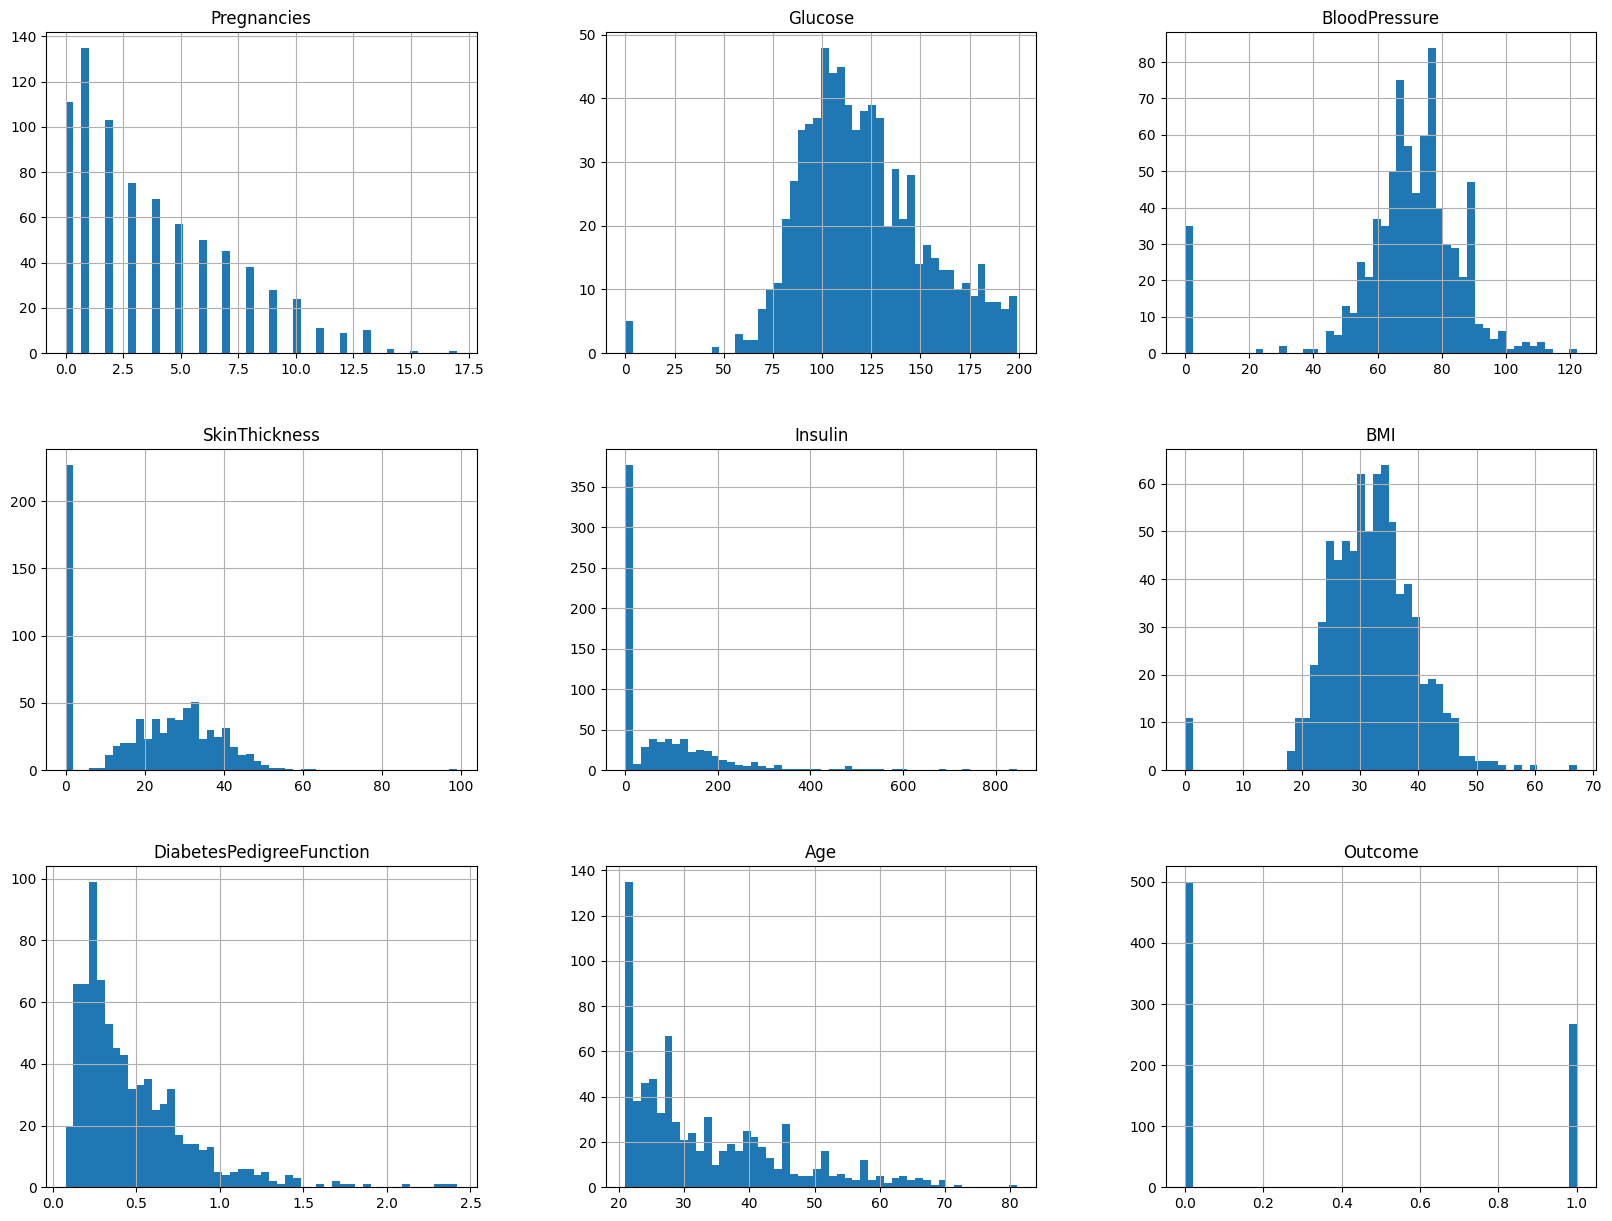

In [18]:
data.hist(bins=50 , figsize =(20,15))

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data, data['Outcome']):
    strat_train = data.loc[train_idx]
    strat_test = data.loc[test_idx]


In [34]:
data = strat_train.copy()
data_X = strat_train.drop("Outcome",axis=1)
data_y = strat_train["Outcome"].copy()

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_X)
X_scaled[0]

array([-0.85135507, -0.98013068, -0.40478372, -0.55397256, -0.33131928,
       -0.60767846,  0.31079384, -0.79216928])

In [60]:
best_model_name = None
best_model = None
best_rmse = float('inf')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Support Vector Classifier (SVC)": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}



In [62]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
        # Use scaled features for training
        scores = cross_val_score(model, X_scaled, data_y, scoring='neg_mean_squared_error', cv=10)
        rmse_scores = np.sqrt(-scores)

        if rmse_scores.mean() < best_rmse:
            best_rmse = rmse_scores.mean()
            best_model_name = name
            best_model = model

In [63]:
best_model.fit(X_scaled,data_y)

LogisticRegression(max_iter=1000)

In [71]:
pred=best_model.predict(X_scaled)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data_y,pred)
accuracy

0.7915309446254072

In [74]:
# Testing
X = strat_test.drop("Outcome",axis=1)
y = strat_test["Outcome"].copy()

In [80]:
scaled_test=scaler.fit_transform(X)
pred_test=best_model.predict(scaled_test)

In [83]:
accuracy = accuracy_score(y,pred_test)
accuracy

0.7077922077922078

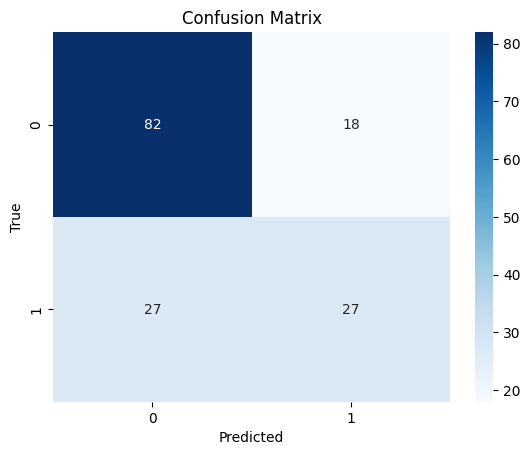

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearDiscriminantAnalysis()
model.fit(X_scaled, data_y) 

conf_matrix = confusion_matrix(y,pred_test)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [56]:
import joblib

In [65]:
joblib.dump(best_model,"best_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [66]:
import joblib
import numpy as np
import pandas as pd

# Load the saved model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

In [70]:
model.predict([[-0.85135507, -0.98013068, -0.40478372, -0.55397256, -0.33131928,
       -0.60767846,  0.31079384, -0.79216928]])

array([0])